Приложение - мобильная утилита для сканирования документов. Модель монетизации
подписочная, есть пробный период 7 дней с дальнейшим переходом в оплату 4.99 USD
в неделю. По ссылке ниже выгрузка с базы данных по оформлениям подписок и оплат.
Каждая строка представляет собой отдельное событие (либо оформление пробной
подписки, либо оплата после завершения пробного периода).
Необходимо:
- рассчитать текущий LTV юзера, используя когортный анализ.
- спрогнозировать, каким будет LTV на полгода.
- Построить график, который будет отображать кривую фактического LTV на фоне кривой прогнозируемого LTV.
- Рассчитать ROMI на 4 недели, если стоимость привлечения платящего пользователя 6 USD

In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [485]:
path = 'path_to_table.xls'

In [486]:
df = pd.read_excel(path)

In [579]:
cohorts = df.query('is_trial_period == True')\
            .sort_values('purchase_date')\
            .drop_duplicates('user_id')[['user_id','purchase_date']]\
            .rename(columns={'purchase_date':'cohort'})
cohorts.shape[0] == cohorts.user_id.nunique()

True

In [537]:
table_cohort = df.merge(cohorts, how = 'left', on = 'user_id')

In [538]:
table_cohort['cost'] = np.where(table_cohort.is_trial_period, 0, 4.99)
table_cohort.drop(columns='product_id', inplace=True)

In [540]:
table_cohort['weekday'] = table_cohort['purchase_date'].dt.week

In [541]:
table_cohort.user_id.nunique() == df.user_id.nunique() #проверка

True

In [580]:
cohort_analysys = table_cohort.query('cohort <= purchase_date and is_trial_period == False')\
        .groupby(['cohort', 'weekday'])\
        .agg({'quantity': lambda x: x.sum()})

In [543]:
cohort_analysys = cohort_analysys[['quantity']]
cohort_analysys_pivot = cohort_analysys.reset_index()\
                    .pivot(index = 'cohort', columns = 'weekday', values = 'quantity')

In [544]:
cohort_analysys_LTV = cohort_analysys_pivot*4.99 

In [545]:
cohort_analysys_LTV # LTV когорты по неделям

weekday,2,3,4,5,6,7,8
cohort,,,,,,,
2020-01-01,1681.63,1387.22,1257.48,1172.65,1047.90,958.08,778.44
2020-01-02,2420.15,2050.89,1736.52,1576.84,1402.19,1297.40,419.16
2020-01-03,2589.81,2105.78,1856.28,1696.60,1511.97,1332.33,99.80
2020-01-04,2744.50,2195.60,1931.13,1781.43,1651.69,1492.01,149.70
2020-01-05,2839.31,2360.27,2135.72,1921.15,1811.37,1611.77,164.67
2020-01-06,NaN,2445.10,1941.11,1726.54,1492.01,1352.29,1057.88
2020-01-07,4.99,2110.77,1721.55,1501.99,1332.33,1147.70,903.19
2020-01-08,4.99,1956.08,1596.80,1377.24,1277.44,1217.56,908.18
2020-01-09,NaN,1856.28,1566.86,1352.29,1187.62,1122.75,339.32


In [581]:
table_cohort2 = table_cohort.query('cohort <= purchase_date')\
        .groupby(['cohort', 'purchase_date'])\
        .agg({'user_id': lambda x: x.nunique(), 
            'cost': lambda x: x.sum()})\
        .reset_index()

In [585]:
users_in_cohort = table_cohort.groupby('cohort').agg({'user_id':'nunique'}).reset_index()

In [586]:
table_cohort2 = table_cohort2.merge(users_in_cohort[['cohort', 'user_id']], how = 'left', on= 'cohort')

In [587]:
table_cohort2 = table_cohort2.rename(columns={'user_id_x':'user_id', 'user_id_y':'all_users_in_cohort'})

In [588]:
table_cohort2['ARPU'] = round((table_cohort2.cost/table_cohort2.all_users_in_cohort), 2)

In [589]:
table_LTV = table_cohort2.groupby('cohort').agg({'ARPU':'sum'})*8 # Lifetime 8 weeks
table_LTV = table_LTV.rename(columns={'ARPU':'LTV'})

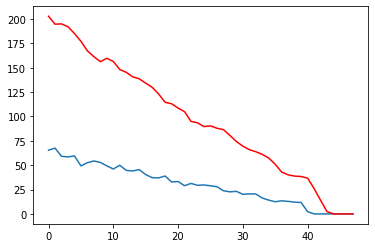

In [591]:
X = table_LTV.LTV
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

for t in range(len(test)):
        length = len(history)
        yhat = np.sum([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
pyplot.plot(test)
pyplot.plot(predictions, color='red')

## ROMI

In [571]:
expenses_sum = df.query('is_trial_period == False')\
            .sort_values('purchase_date')\
            .drop_duplicates('user_id')[['user_id','purchase_date']]\
            .rename(columns={'purchase_date':'purchase_date'})
expenses_sum.shape[0] == expenses_sum.user_id.nunique()

True

In [573]:
expenses_sum['expenses'] = 6

In [575]:
expenses = expenses_sum.query("purchase_date > '2020-01-01' and purchase_date <= '2020-01-28'").expenses.sum() #сумма расходов на привлечение за 4 недели
revenue = table_cohort.query("purchase_date > '2020-01-01' and purchase_date <= '2020-01-28'").cost.sum()      # сумма валовой прибыли за 4 недели
ROMI_4_week = (revenue - expenses) / expenses *100.00
print ('ROMI_4_week = ', round(ROMI_4_week,2), '%')

ROMI_4_week =  44.76 %
